In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

import ast
from numpy import dot
from numpy.linalg import norm
from collections import Counter


import os
os.getcwd()

'c:\\Users\\tinac\\OneDrive - 한양대학교\\2023\\KB\\3. DCX\\5. 1차_KMeans+ TF-IDF\\2차'

In [2]:
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [17]:
num_clusters = 5
df = pd.read_csv(f'./비금융_Kmeans_pvdm100_#{num_clusters}.csv', encoding='utf-8-sig')


In [18]:
df

,Unnamed: 0.1,Unnamed: 0,review,target,Mecab_token,vector,cluster
0,0,35,박대리의 다이어리를 만들게 된 계기 youtu be VfYaT EB rc유튜브에 영...,1.0,"['사람', '그램', '만들', '영상', '노동자', '스토어', '상품', '...","[0.230530873, 0.13667047, 0.155447453, -0.0241...",3
1,1,77,다시 산티아고로 일 차 일 차랄라소냐 팜플로나 km km km 랄라소냐에는 특별한 ...,1.0,"['주방', '이야기', '팜플로나', '야외', '호주', '단어', '초대', ...","[0.01656551, 0.9915376, 0.54295725, -0.4211259...",4
2,2,97,당신 잘 보고 있나요 안녕하세요 안수입니다 새해에도 당신을 보게 되어 반갑습니다 이...,1.0,"['이야기', '나이', '수많', '잡아채', '별로', '쳐다보', '피아노',...","[0.03983325, 0.5227713, 0.4408229, -0.07539991...",1
3,3,120,미리 걱정할 필요가 없다 주 전에 예초기를 사용하다가 날을 고정하는 너트를 잊었다 ...,1.0,"['주변', '문제', '초기', '처남', '이점', '들추', '너트', '조립...","[-0.26575035, -0.2719116, 0.4544716, -0.229887...",1
4,4,153,친정엄마의 텃밭은 무엇이 다른가 몇 전 아파트 뒷마당에 텃밭을 만든 적이 있었다 상...,1.0,"['더없이', '과정', '남성', '아침', '오이', '물집', '잡히', '내...","[-0.03079071, 0.7714013, -0.02061863, -0.64970...",4
...,...,...,...,...,...,...,...
54024,54024,504411,아동복 도매 아동복도매 어디 이용하시나요 카페랑 사이트 어디를 이용하시나요 장단점이...,1.0,"['이용', '마켓', '도매', '신상', '사이트', '아동복', '딜리버드',...","[0.151119009, 0.180248246, 0.172265843, -0.133...",0
54025,54025,504583,빈티지옷 입문 빈티지옷같은거 에이블리에서 사면 너무 흔하고 다 똑같애서 사기싫은데 ...,1.0,"['블리', '지랑', '구매', '에이', '똑같', '입문', '매장', '호스...","[0.40129158, -0.07345622, 0.3633006, -0.119939...",3
54026,54026,504725,빈티지 스토어 의류 인스타 보면 빈티지 스토어가 많이 보이는데 옷들은 어디서 가져오...,1.0,"['가져오', '빈티지', '보이', '스타', '따로', '의류', '많이', '...","[0.460534662, 0.344071954, -0.149914116, 0.043...",3
54027,54027,505300,인스타나 빈티지샵에서 인스타에서 판매하는 빈티지의류는 대부분 어디서 때오나요 빈티지...,1.0,"['스타나', '등록', '빈티지', '스타', '의류', '판매', '대부분', ...","[-0.07017128, 0.15752062, -0.09023795, 0.01321...",3


In [19]:
off_str = '편의점|편의점점주|편의점점장|경영주|SC|OFC|FC|발주|편택|포스기|과일가게|꽃집|꽃시장|세탁소|전자담배|피티샵|필라테스|핸드폰대리점|대리점|코인노래방|재래시장|상인회|빈티지|무인|인생네컷|아크|아할|세계과자|출입인증|캡스|도난|보안|키오스크|셀프계산대|자판기|카드겸용|배분율|렌탈'
offline_list = off_str.split('|')
on_str = '구매대행|위탁판매|사입|수입|송장|배대지|3PL|통관번호|입점|판매자격|상품등록|썸네일|셀러|빠른정산|통신판매|쿠팡|티몬|11번가|위메프|오늘의집|텐바이텐|로아스|CPC|파워링크|쇼핑몰통합관리|라이브커머스|럭키투데이|아이템위너|즉시할인쿠폰|검색광고|소싱|도매매|오너클랜|도매꾹|스마트스토어|스토어팜|스스|사업장주소|선정산|톡톡|구매확정|이미지호스팅|스마트콜|베스트리뷰|파워등급|마켓플레이스|스마트플레이스|쇼핑윈도|빅파워|트래픽|어뷰징|유입경로|동대문|청평화|디오트|미송|장끼|대봉|밤시장|사입삼촌|사입비|거래처|발품|단가|샘플|구제|택배계약|지연패널티|자사몰|브랜디|에이블리|지그재그|직잭메이트|신상마켓|셀러스|파트너스|핸드메이드|도메인|스튜디오|촬영대행|모델|피팅모델|공구|벤더|블로그마켓|블로그페이|인스타|인스타마켓|팔로워|협찬|공구마켓|효소|괄사|약과|속눈썹영양제|압박스타킹|사료|젓갈|다이어트보조제|호박즙|육아용품'
online_list = on_str.split('|')


0.06867487967263733 online
0.8645005905088587 online
0.9458495776028119 offline
0.6921165079449539 online
0.8561444839941502 online
------------------------------------------------------------------------
TF-IDF
cluster
3    1522971
0    2110957
4    2496526
2    2818220
1    2953813
Name: Mecab_token, dtype: int64
------------------------------------------------------------------------


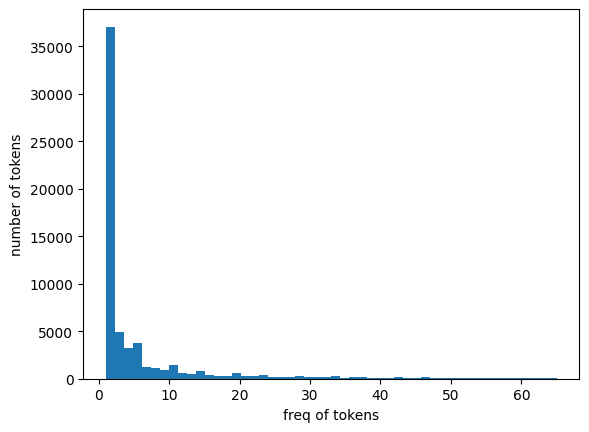

(14566, 4)
(6982, 4)
(8862, 4)
(15539, 4)
(8080, 4)
------------------------------------------------------------------------


In [20]:
df["vector"] = df["vector"].apply(lambda x : np.array(ast.literal_eval(x)))

rep = []
for i in df["cluster"].unique():
    imsi = df[df["cluster"] == i] 
    rep.append(np.mean(imsi["vector"]))

online = []
offline = []

for a, i in enumerate(df["Mecab_token"]):
    for o, of in zip(online_list, offline_list):
        if o in i:
            online.append(df["vector"].loc[a])
        elif of in i:
            offline.append(df["vector"].loc[a])
        else:
            pass

online_result = np.mean(np.array(online), axis=0)
offline_result = np.mean(np.array(offline), axis=0)

for i in rep:
    if cos_sim(i, online_result) > cos_sim(i, offline_result):
        print(cos_sim(i, online_result), "online")
    else:
        print(cos_sim(i, offline_result), "offline")

print("------------------------------------------------------------------------")
print("TF-IDF")
# 'cluster' 칼럼을 기준으로 그룹화하고, 'Mecab_token' 칼럼의 리스트 내 값들의 수를 합산
result = df.groupby('cluster')['Mecab_token'].apply(lambda x: x.apply(len).sum())

print(result.sort_values())
print("------------------------------------------------------------------------")
df["Mecab_token"] = df["Mecab_token"].apply(lambda x : ast.literal_eval(x))

subs = [df[df["cluster"]==i].reset_index(drop=True) for i in range(num_clusters)]

cnt = []
for i in subs:
    imsi = []
    for w in i["Mecab_token"]:
        for p in w:
            imsi.append(p)
    cnt.append(imsi)

cnt = [Counter(i) for i in cnt]
cnt = [dict(zip(list(i.keys()), list(i.values()))) for i in cnt]

full = []
for i in df["Mecab_token"]:
    for w in i:
        full.append(w)
full = Counter(full)

full = dict(zip(list(full.keys()), list(full.values())))

tfidf = []
for i in cnt:
    keyword = []
    imsi = []
    for w in i.keys():
        keyword.append(w)
        imsi.append(i[w]/full[w])
    tfidf.append(dict(zip(keyword, imsi)))

freq = []
for i in cnt:
    for w in i.values():
        if w < 66:
            freq.append(w)

plt.hist(freq, bins=50)
plt.xlabel('freq of tokens')
plt.ylabel('number of tokens')
#plt.xticks((0, 100))
plt.show()

tfidf10 = []
for i in cnt:
    keyword = []
    imsi = []
    for w in i.keys():
        if i[w] >= 10:
            keyword.append(w)
            imsi.append(i[w] / full[w])
            
    tfidf10.append(dict(zip(keyword, imsi)))


file_direct = os.path.expanduser('./')

for a, i in enumerate(tfidf10):
    imsi = {"단어" : list(i.keys()), "tfidf" : list(i.values())}
    imsi = pd.DataFrame(imsi)
    # 빈도수 데이터 길이 조정
    freq_values = list(cnt[a].get(word, 0) for word in i.keys())  # 키워드에 해당하는 빈도수 값을 가져오고, 없으면 0으로 설정
    imsi["빈도"] = freq_values
    #imsi["빈도"] = list(cnt[a].values())
    imsi["Cluster"] = a
    file_path = os.path.join(file_direct, f"비금융_Kmeans_pvdm_100_#{num_clusters}_Cluster{a}.csv")
    imsi.to_csv(file_path, encoding = "utf-8-sig")

for i in range(0,num_clusters):
    dfn = df[df.cluster == i]
    dfn = dfn[['Unnamed: 0', 'review', 'Mecab_token', 'cluster']]
    dfn.to_csv(f'비금융_Kmeans_pvdm_100_#{num_clusters}_원문_Cluster{i}.csv', encoding='utf-8-sig', index=False)
    print(dfn.shape)

print("------------------------------------------------------------------------")

file_list = glob.glob(f"*#{num_clusters}_Cluster*.csv")
dfs = []
for file in file_list:
    df_file = pd.read_csv(file)
    df_file.sort_values(by = 'tfidf', inplace=True)
    dfs.append(df_file)

In [12]:
newdfs = pd.concat(dfs, axis=1, join='inner')
newdfs.columns = [list(dfs[1].columns.unique()) * num_clusters]

newdfs.to_excel("./check.xlsx")